In [ ]:
!pip install wordcloud==1.8.2.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Tahap Cleaning

In [ ]:
# library needed 
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pandas.io.json import json_normalize

In [ ]:
# Load the raw dataset
df  = pd.read_csv('PetaBencana_Dataset.csv')
b= pd.read_csv("rekap-banjir-2020.csv")

In [ ]:
df.head()

,pkey,date,time,source,status,url,image_url,disaster_type,report_dat,tags,...,ID_Desa,ID_Kec,ID_Kab,ID_Prov,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
0,94941,01/01/2020,00:03:02,grasp,confirmed,2042596d-b551-4ef2-803d-1ee964cf2278,https://images.petabencana.id/2042596d-b551-4e...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",...,3.174020e+09,3174020.0,3174.0,31.0,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.76866,-6.16978
1,95061,01/01/2020,00:43:02,grasp,confirmed,5a0ad45f-7020-43b7-882f-672487ebc6d8,https://images.petabencana.id/5a0ad45f-7020-43...,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.275061e+09,3275061.0,3275.0,32.0,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.97870,-6.17944
2,95062,01/01/2020,01:14:53,grasp,confirmed,e065b40d-2084-48d6-b42f-1f98cb33e4cc,NaN,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",...,3.172060e+09,3172060.0,3172.0,31.0,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.89100,-6.23449
3,95063,01/01/2020,01:15:08,grasp,confirmed,7cb26903-b1c8-4be7-8b81-7014c8a83fbd,https://images.petabencana.id/7cb26903-b1c8-4b...,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...",...,3.216061e+09,3216061.0,3216.0,32.0,Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.16189,-6.30170
4,95064,01/01/2020,01:18:03,grasp,confirmed,570d2cb8-d5b6-404f-86ef-8a2a0d27f391,https://images.petabencana.id/570d2cb8-d5b6-40...,flood,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...","{ ""district_id"": ""3173"", ""local_area_id"": ""193...",...,3.173060e+09,3173060.0,3173.0,31.0,Cempaka Baru,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.86092,-6.16859


In [ ]:
# ukuran dataset
df.shape

(4235, 22)

In [ ]:
# cek tiap kolom apakah ada yang kosong 
df.isna().any()

pkey             False
date             False
time             False
source           False
status           False
url               True
image_url         True
disaster_type    False
report_dat        True
tags             False
title             True
text              True
ID_Desa           True
ID_Kec            True
ID_Kab            True
ID_Prov           True
Desa              True
Kecamatan         True
Kabupaten         True
Provinsi          True
long             False
lat              False
dtype: bool

In [ ]:
# Terdapat missing dan broken data di 'text'
# 'Mengisi 'text' kosong dengan '-'
df['text'].fillna(value="-")
df.loc[:,'text']

0       Banjir di daerah taman ratu dan sekitarnya. Pa...
1         Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi
2       Banjir selutut orang dewasa di jalan ros merah...
3       Banjir di daerah kedasih dan sekitarnya, karen...
4                                                     NaN
                              ...                        
4230    Luapan air sungai Karangan masuk ke pemukiman ...
4231                                  banjir lah pokoknya
4232    saluran irigasi yg di kelola desa dengan buruk...
4233    Terdapat genangan air di Jalan Arteri Jorr Jat...
4234    banjir akibat hujan dan banyak nya sampah memb...
Name: text, Length: 4235, dtype: object

- Yang mempunyai data kosong: url, image_url, report_dat, title, text, Id_Desa_, Id_Kec_, Id_ Kab, Id_ prov_ Desa, 


-  Kecamatan, Kabupaten, Provinsi

In [ ]:
# Mencari data 'ID_Desa' yang tidak sesuai datanya/rusak
df.loc[df['ID_Desa'].isnull()]

,pkey,date,time,source,status,url,image_url,disaster_type,report_dat,tags,...,ID_Desa,ID_Kec,ID_Kab,ID_Prov,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
3662,285338,13/03/2021,04:09:13,grasp,confirmed,8c2d2379-874c-4155-a5e1-2b3311335aec,https://images.petabencana.id/8c2d2379-874c-41...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 133 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.692560,15.031920
3663,285339,13/03/2021,04:13:15,grasp,confirmed,809c92d9-2bf9-4476-89b0-8028827a34c6,https://images.petabencana.id/809c92d9-2bf9-44...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 105 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.736060,15.068870
3692,285520,04/04/2021,09:26:52,grasp,confirmed,1c5d7a18-7737-4319-aaef-9ad2187d283d,https://images.petabencana.id/1c5d7a18-7737-43...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 88 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.000000,-9.000000
3725,285675,10/04/2021,10:46:28,grasp,confirmed,f49d31ae-53d2-4fcb-850b-259a3c47ac21,https://images.petabencana.id/f49d31ae-53d2-4f...,earthquake,"{ ""report_type"": ""road"", ""accessabilityFailure...","{ ""district_id"": null, ""local_area_id"": null, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.402340,-4.083450
3811,296168,16/06/2021,10:37:58,grasp,confirmed,904bcd24-db65-4cc4-a9d0-cf0d39944d20,https://images.petabencana.id/904bcd24-db65-4c...,wind,"{ ""report_type"": ""wind"", ""impact"": 0 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,Banyuwangi,Jawa Timur,114.385700,-8.205030
3942,298498,11/10/2021,13:24:48,grasp,confirmed,961dd021-a82a-4706-a2ab-f440f01aefe4,NaN,earthquake,"{ ""report_type"": ""structure"", ""structureFailur...","{ ""district_id"": null, ""local_area_id"": null, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.018677,0.774220
3956,298554,19/10/2021,07:00:28,grasp,confirmed,5acfdc0f-8764-4d6f-b5a0-0bbc3d777d1a,NaN,earthquake,"{ ""report_type"": ""structure"", ""structureFailur...","{ ""district_id"": null, ""local_area_id"": null, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.351460,48.856696
4227,299717,27/12/2021,08:41:24,grasp,confirmed,c27e71ae-22c2-48bc-ac97-7aa4217ce651,NaN,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 63 }","{ ""district_id"": null, ""local_area_id"": null, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.813263,18.903688


- pkey tidak diperlukan


- 'ID desa', 'ID kec', 'ID kab', 'ID prov' tidak diperlukan karena telah diwakili oleh kolomnya yang tanpa id


- 'url' & 'image url' tidak diperlukan karena sudah diwakilkan di column 'Source'


- 'title' banyak yang datanya kosong. Selain itu, semua yang ada di 'title' merupakan rangkuman dari 'teks'


- report dat' dan 'tags' dapat dihapus jika digunakan dalam membuat graph

In [ ]:
# menghapus 'pkey', 'ID_Desa', 'ID_Kec', 'ID_Kab', 'ID_Prov'
# Dataframe ini dapat digunakan untuk mencari info yang diperlukan
df = df.drop(columns=['pkey','ID_Desa', 'ID_Kec', 'ID_Kab', 'ID_Prov']);
# data ID dihapus karena unique
df.head()

,date,time,source,status,url,image_url,disaster_type,report_dat,tags,title,text,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
0,01/01/2020,00:03:02,grasp,confirmed,2042596d-b551-4ef2-803d-1ee964cf2278,https://images.petabencana.id/2042596d-b551-4e...,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }","{ ""district_id"": ""3174"", ""local_area_id"": ""125...",NaN,Banjir di daerah taman ratu dan sekitarnya. Pa...,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.76866,-6.16978
1,01/01/2020,00:43:02,grasp,confirmed,5a0ad45f-7020-43b7-882f-672487ebc6d8,https://images.petabencana.id/5a0ad45f-7020-43...,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...","{ ""district_id"": null, ""local_area_id"": null, ...",NaN,Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.97870,-6.17944
2,01/01/2020,01:14:53,grasp,confirmed,e065b40d-2084-48d6-b42f-1f98cb33e4cc,NaN,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...","{ ""district_id"": ""3172"", ""local_area_id"": ""178...",NaN,Banjir selutut orang dewasa di jalan ros merah...,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.89100,-6.23449
3,01/01/2020,01:15:08,grasp,confirmed,7cb26903-b1c8-4be7-8b81-7014c8a83fbd,https://images.petabencana.id/7cb26903-b1c8-4b...,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","{ ""district_id"": null, ""local_area_id"": null, ...",NaN,"Banjir di daerah kedasih dan sekitarnya, karen...",Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.16189,-6.30170
4,01/01/2020,01:18:03,grasp,confirmed,570d2cb8-d5b6-404f-86ef-8a2a0d27f391,https://images.petabencana.id/570d2cb8-d5b6-40...,flood,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...","{ ""district_id"": ""3173"", ""local_area_id"": ""193...",NaN,NaN,Cempaka Baru,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.86092,-6.16859


In [ ]:
df.isna().any()

date             False
time             False
source           False
status           False
url               True
image_url         True
disaster_type    False
report_dat        True
tags             False
title             True
text              True
Desa              True
Kecamatan         True
Kabupaten         True
Provinsi          True
long             False
lat              False
dtype: bool

In [ ]:
# Mencari data 'time' yang tidak sesuai datanya/rusak
test2 = df.query("time.str.len() != 8", engine="python")
test2.shape

(1679, 17)

In [ ]:
# TESTING
#df['time'].unique()
#.replace()

In [ ]:
# menghitung jumlah baris data yang tidak bernilai NaN pada dataframe.
print("url : "+ str(df["url"].count()) + ", image url : " + str(df["image_url"].count()) + ", report dat : " + str(df["report_dat"].count()))
print("title : " + str(df["title"].count())+", text : " + str(df["text"].count())+", Desa : " + str(df["Desa"].count()))
print("Kecamatan : " + str(df["Kecamatan"].count())+", Kabupaten : " + str(df["Kabupaten"].count())+", Provinsi : " + str(df["Provinsi"].count()))


url : 3570, image url : 3334, report dat : 3455
title : 188, text : 3830, Desa : 4227
Kecamatan : 4227, Kabupaten : 4228, Provinsi : 4228


In [ ]:
# Analisis berapa persen missing value lihat berapa persen
print("==== Persen Variable yang mengalami missing value (>= 30% hilang bisa disarankan di drop) ====")
print ("Nilai url:  "+str(100-((3570/4235) *100)))
print ("Nilai image url:  "+str(100-((3334/4235) *100)))
print ("Nilai report dat:  "+str(100-((3455/4235) *100)))
print ("Nilai title: "+str(100-((188/4235) *100)))
print ("Nilai text: "+str(100-((3830/4235) *100)))
print ("Nilai Desa: "+str(100-((4227/4235) *100)))
print ("Nilai Kecamatan: "+str(100-((4227/4235) *100)))
print ("Nilai Kabupaten: "+str(100-((4228/4235) *100)))
print ("Nilai Provinsi: "+str(100-((4228/4235) *100)))

==== Persen Variable yang mengalami missing value (>= 30% hilang bisa disarankan di drop) ====
Nilai url:  15.702479338842977
Nilai image url:  21.275088547815827
Nilai report dat:  18.417945690672965
Nilai title: 95.5608028335301
Nilai text: 9.56316410861865
Nilai Desa: 0.18890200708382565
Nilai Kecamatan: 0.18890200708382565
Nilai Kabupaten: 0.16528925619834922
Nilai Provinsi: 0.16528925619834922


In [ ]:
# menghapus 'url', 'image_url', 'title', dan 'tags'
# Dataframe ini dapat digunakan untuk membuat visualisasi
# drop kolom title karena terlalu banyak missing value
df = df.drop(columns=['url','image_url', 'title','tags']);
df.head()

,date,time,source,status,disaster_type,report_dat,text,Desa,Kecamatan,Kabupaten,Provinsi,long,lat
0,01/01/2020,00:03:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }",Banjir di daerah taman ratu dan sekitarnya. Pa...,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.76866,-6.16978
1,01/01/2020,00:43:02,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...",Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.97870,-6.17944
2,01/01/2020,01:14:53,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...",Banjir selutut orang dewasa di jalan ros merah...,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.89100,-6.23449
3,01/01/2020,01:15:08,grasp,confirmed,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","Banjir di daerah kedasih dan sekitarnya, karen...",Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.16189,-6.30170
4,01/01/2020,01:18:03,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 15, ""report_type...",NaN,Cempaka Baru,Kemayoran,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.86092,-6.16859


Terdapat kolom title yang besar baris kosong mencapai 95% sehingga perlu didrop

In [ ]:
df.isna().any()

date             False
time             False
source           False
status           False
disaster_type    False
report_dat        True
text              True
Desa              True
Kecamatan         True
Kabupaten         True
Provinsi          True
long             False
lat              False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4235 non-null   object 
 1   time           4235 non-null   object 
 2   source         4235 non-null   object 
 3   status         4235 non-null   object 
 4   disaster_type  4235 non-null   object 
 5   report_dat     3455 non-null   object 
 6   text           3830 non-null   object 
 7   Desa           4227 non-null   object 
 8   Kecamatan      4227 non-null   object 
 9   Kabupaten      4228 non-null   object 
 10  Provinsi       4228 non-null   object 
 11  long           4235 non-null   float64
 12  lat            4235 non-null   float64
dtypes: float64(2), object(11)
memory usage: 430.2+ KB


In [ ]:
# 
df["disaster_type"].mode()

0    flood
dtype: object

Karena disaster type terbanyak itu adalah banjir kami akan memfokuskan scope project ini pada banjir terutama di wilayah DKI Jakarta

In [ ]:
# Membuat dataframe Info yang bersih
df = df.dropna()
df.isna().any()

date             False
time             False
source           False
status           False
disaster_type    False
report_dat       False
text             False
Desa             False
Kecamatan        False
Kabupaten        False
Provinsi         False
long             False
lat              False
dtype: bool

In [ ]:
import json
result = []
lst_data = list(df['report_dat'])
for i in lst_data:
  conv = str(i)
  proses = json.loads(conv)
  result.append(proses)


In [ ]:
result

[{'report_type': 'flood', 'flood_depth': 30},
 {'points': 1, 'flood_depth': 80, 'report_type': 'flood'},
 {'points': 1, 'flood_depth': 51, 'report_type': 'flood'},
 {'points': 2, 'flood_depth': 100, 'report_type': 'flood'},
 {'report_type': 'flood', 'flood_depth': 60},
 {'report_type': 'flood', 'flood_depth': 39},
 {'report_type': 'flood', 'flood_depth': 79},
 {'report_type': 'flood', 'flood_depth': 116},
 {'report_type': 'flood', 'flood_depth': 60},
 {'points': 1},
 {'report_type': 'flood', 'flood_depth': 81},
 {'report_type': 'flood', 'flood_depth': 69},
 {'points': 1, 'flood_depth': 195, 'report_type': 'flood'},
 {'points': 1, 'flood_depth': 100, 'report_type': 'flood'},
 {'report_type': 'flood', 'flood_depth': 44},
 {'points': 1, 'flood_depth': 93, 'report_type': 'flood'},
 {'points': -1, 'flood_depth': 101, 'report_type': 'flood'},
 {'report_type': 'flood', 'flood_depth': 190},
 {'report_type': 'flood', 'flood_depth': 50},
 {'report_type': 'flood', 'flood_depth': 50},
 {'report_ty

In [ ]:
y = pd.DataFrame(result)

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   report_type           2970 non-null   object 
 1   flood_depth           2774 non-null   float64
 2   points                723 non-null    float64
 3   structureFailure      65 non-null     float64
 4   accessabilityFailure  44 non-null     float64
 5   condition             44 non-null     float64
 6   impact                56 non-null     float64
 7   fireDistance          12 non-null     float64
 8   fireLocation          12 non-null     object 
 9   personLocation        12 non-null     object 
 10  fireRadius            12 non-null     object 
 11  volcanicSigns         17 non-null     object 
 12  evacuationNumber      17 non-null     float64
 13  evacuationArea        17 non-null     object 
 14  visibility            2 non-null      float64
 15  airQuality           

In [ ]:
y = y.drop(columns=['points','structureFailure', 'accessabilityFailure','condition','impact','fireDistance','fireLocation','personLocation','fireRadius','volcanicSigns','evacuationNumber','evacuationNumber','visibility','airQuality','evacuationArea']);
y.head()

,report_type,flood_depth
0,flood,30.0
1,flood,80.0
2,flood,51.0
3,flood,100.0
4,flood,60.0


In [ ]:
y.shape

(3043, 2)

In [ ]:
df.shape

(3043, 13)

In [ ]:
df = df.reset_index()
y = y.reset_index()

In [ ]:
frames = [df, y] 
result = pd.concat(frames, axis=1)

In [ ]:
df = result

In [ ]:
df

,index,date,time,source,status,disaster_type,report_dat,text,Desa,Kecamatan,Kabupaten,Provinsi,long,lat,index,report_type,flood_depth
0,0,01/01/2020,00:03:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }",Banjir di daerah taman ratu dan sekitarnya. Pa...,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.768660,-6.169780,0,flood,30.0
1,1,01/01/2020,00:43:02,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...",Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.978700,-6.179440,1,flood,80.0
2,2,01/01/2020,01:14:53,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...",Banjir selutut orang dewasa di jalan ros merah...,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.891000,-6.234490,2,flood,51.0
3,3,01/01/2020,01:15:08,grasp,confirmed,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","Banjir di daerah kedasih dan sekitarnya, karen...",Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.161890,-6.301700,3,flood,100.0
4,5,01/01/2020,01:25:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 60 }",Banjir area komplek Meruya Ilir sejak jam 5 na...,Meruya Utara,Kembangan,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.738350,-6.199330,4,flood,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,4229,28/12/2021,00:18:56,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 68, ""report_type...",Laporan awal. Air sungai meluap akibat curah h...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.655871,1.343771,3038,flood,68.0
3039,4230,28/12/2021,01:23:43,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }",Luapan air sungai Karangan masuk ke pemukiman ...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.665504,1.351043,3039,flood,103.0
3040,4231,28/12/2021,08:00:14,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }",banjir lah pokoknya,Karang Anyar,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.827622,-6.157398,3040,flood,54.0
3041,4232,28/12/2021,10:49:49,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }",saluran irigasi yg di kelola desa dengan buruk...,Purwajaya,Purwadadi,Ciamis,Jawa Barat,108.695570,-7.460077,3041,flood,19.0


In [ ]:
# filter disaster type = flood
df[df["disaster_type"]=="flood"]

,index,date,time,source,status,disaster_type,report_dat,text,Desa,Kecamatan,Kabupaten,Provinsi,long,lat,index,report_type,flood_depth
0,0,01/01/2020,00:03:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }",Banjir di daerah taman ratu dan sekitarnya. Pa...,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.768660,-6.169780,0,flood,30.0
1,1,01/01/2020,00:43:02,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...",Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.978700,-6.179440,1,flood,80.0
2,2,01/01/2020,01:14:53,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...",Banjir selutut orang dewasa di jalan ros merah...,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.891000,-6.234490,2,flood,51.0
3,3,01/01/2020,01:15:08,grasp,confirmed,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","Banjir di daerah kedasih dan sekitarnya, karen...",Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.161890,-6.301700,3,flood,100.0
4,5,01/01/2020,01:25:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 60 }",Banjir area komplek Meruya Ilir sejak jam 5 na...,Meruya Utara,Kembangan,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.738350,-6.199330,4,flood,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,4229,28/12/2021,00:18:56,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 68, ""report_type...",Laporan awal. Air sungai meluap akibat curah h...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.655871,1.343771,3038,flood,68.0
3039,4230,28/12/2021,01:23:43,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }",Luapan air sungai Karangan masuk ke pemukiman ...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.665504,1.351043,3039,flood,103.0
3040,4231,28/12/2021,08:00:14,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }",banjir lah pokoknya,Karang Anyar,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.827622,-6.157398,3040,flood,54.0
3041,4232,28/12/2021,10:49:49,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }",saluran irigasi yg di kelola desa dengan buruk...,Purwajaya,Purwadadi,Ciamis,Jawa Barat,108.695570,-7.460077,3041,flood,19.0


In [ ]:
df["report_type"] = df["report_type"].fillna("flood")

In [ ]:
df

,index,date,time,source,status,disaster_type,report_dat,text,Desa,Kecamatan,Kabupaten,Provinsi,long,lat,index,report_type,flood_depth
0,0,01/01/2020,00:03:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }",Banjir di daerah taman ratu dan sekitarnya. Pa...,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.768660,-6.169780,0,flood,30.0
1,1,01/01/2020,00:43:02,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...",Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.978700,-6.179440,1,flood,80.0
2,2,01/01/2020,01:14:53,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...",Banjir selutut orang dewasa di jalan ros merah...,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.891000,-6.234490,2,flood,51.0
3,3,01/01/2020,01:15:08,grasp,confirmed,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","Banjir di daerah kedasih dan sekitarnya, karen...",Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.161890,-6.301700,3,flood,100.0
4,5,01/01/2020,01:25:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 60 }",Banjir area komplek Meruya Ilir sejak jam 5 na...,Meruya Utara,Kembangan,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.738350,-6.199330,4,flood,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,4229,28/12/2021,00:18:56,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 68, ""report_type...",Laporan awal. Air sungai meluap akibat curah h...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.655871,1.343771,3038,flood,68.0
3039,4230,28/12/2021,01:23:43,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }",Luapan air sungai Karangan masuk ke pemukiman ...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.665504,1.351043,3039,flood,103.0
3040,4231,28/12/2021,08:00:14,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }",banjir lah pokoknya,Karang Anyar,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.827622,-6.157398,3040,flood,54.0
3041,4232,28/12/2021,10:49:49,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }",saluran irigasi yg di kelola desa dengan buruk...,Purwajaya,Purwadadi,Ciamis,Jawa Barat,108.695570,-7.460077,3041,flood,19.0


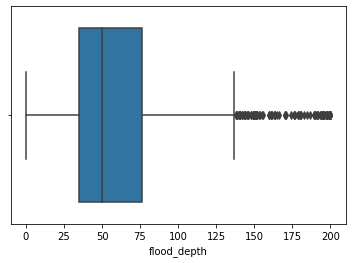

In [ ]:
sns.boxplot(x='flood_depth', data=df);

Ditemukan adanya outlier di data flood depth sehingga missing valunya diisi dengan median

In [ ]:
df["flood_depth"] = df["flood_depth"].fillna(df["flood_depth"].median())

In [ ]:
df

,index,date,time,source,status,disaster_type,report_dat,text,Desa,Kecamatan,Kabupaten,Provinsi,long,lat,index,report_type,flood_depth
0,0,01/01/2020,00:03:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 30 }",Banjir di daerah taman ratu dan sekitarnya. Pa...,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.768660,-6.169780,0,flood,30.0
1,1,01/01/2020,00:43:02,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 80, ""report_type...",Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.978700,-6.179440,1,flood,80.0
2,2,01/01/2020,01:14:53,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 51, ""report_type...",Banjir selutut orang dewasa di jalan ros merah...,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.891000,-6.234490,2,flood,51.0
3,3,01/01/2020,01:15:08,grasp,confirmed,flood,"{ ""points"": 2, ""flood_depth"": 100, ""report_typ...","Banjir di daerah kedasih dan sekitarnya, karen...",Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.161890,-6.301700,3,flood,100.0
4,5,01/01/2020,01:25:02,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 60 }",Banjir area komplek Meruya Ilir sejak jam 5 na...,Meruya Utara,Kembangan,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.738350,-6.199330,4,flood,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,4229,28/12/2021,00:18:56,grasp,confirmed,flood,"{ ""points"": 1, ""flood_depth"": 68, ""report_type...",Laporan awal. Air sungai meluap akibat curah h...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.655871,1.343771,3038,flood,68.0
3039,4230,28/12/2021,01:23:43,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 103 }",Luapan air sungai Karangan masuk ke pemukiman ...,Karangan Hilir,Karangan,Kutai Timur,Kalimantan Timur,117.665504,1.351043,3039,flood,103.0
3040,4231,28/12/2021,08:00:14,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 54 }",banjir lah pokoknya,Karang Anyar,Sawah Besar,Jakarta Pusat,Daerah Khusus Ibukota Jakarta,106.827622,-6.157398,3040,flood,54.0
3041,4232,28/12/2021,10:49:49,grasp,confirmed,flood,"{ ""report_type"": ""flood"", ""flood_depth"": 19 }",saluran irigasi yg di kelola desa dengan buruk...,Purwajaya,Purwadadi,Ciamis,Jawa Barat,108.695570,-7.460077,3041,flood,19.0


In [ ]:
# hapus report_dat karena file jsonnya sudah diekstrak menjadi kolom baru
df = df.drop(columns=['report_dat']);
df.head()

,index,date,time,source,status,disaster_type,text,Desa,Kecamatan,Kabupaten,Provinsi,long,lat,index,report_type,flood_depth
0,0,01/01/2020,00:03:02,grasp,confirmed,flood,Banjir di daerah taman ratu dan sekitarnya. Pa...,Duri Kepa,Kebon Jeruk,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.76866,-6.16978,0,flood,30.0
1,1,01/01/2020,00:43:02,grasp,confirmed,flood,Jl. Kemuning Indah\nKota Harapan Indah.\nBekasi,Pejuang,Medan Satria,Bekasi,Jawa Barat,106.97870,-6.17944,1,flood,80.0
2,2,01/01/2020,01:14:53,grasp,confirmed,flood,Banjir selutut orang dewasa di jalan ros merah...,Cipinang Muara,Jatinegara,Jakarta Timur,Daerah Khusus Ibukota Jakarta,106.89100,-6.23449,2,flood,51.0
3,3,01/01/2020,01:15:08,grasp,confirmed,flood,"Banjir di daerah kedasih dan sekitarnya, karen...",Mekarmukti,Cikarang Utara,Bekasi,Jawa Barat,107.16189,-6.30170,3,flood,100.0
4,5,01/01/2020,01:25:02,grasp,confirmed,flood,Banjir area komplek Meruya Ilir sejak jam 5 na...,Meruya Utara,Kembangan,Jakarta Barat,Daerah Khusus Ibukota Jakarta,106.73835,-6.19933,4,flood,60.0


In [ ]:
df.shape

(3043, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          3043 non-null   int64  
 1   date           3043 non-null   object 
 2   time           3043 non-null   object 
 3   source         3043 non-null   object 
 4   status         3043 non-null   object 
 5   disaster_type  3043 non-null   object 
 6   text           3043 non-null   object 
 7   Desa           3043 non-null   object 
 8   Kecamatan      3043 non-null   object 
 9   Kabupaten      3043 non-null   object 
 10  Provinsi       3043 non-null   object 
 11  long           3043 non-null   float64
 12  lat            3043 non-null   float64
 13  index          3043 non-null   int64  
 14  report_type    3043 non-null   object 
 15  flood_depth    3043 non-null   float64
dtypes: float64(3), int64(2), object(11)
memory usage: 380.5+ KB


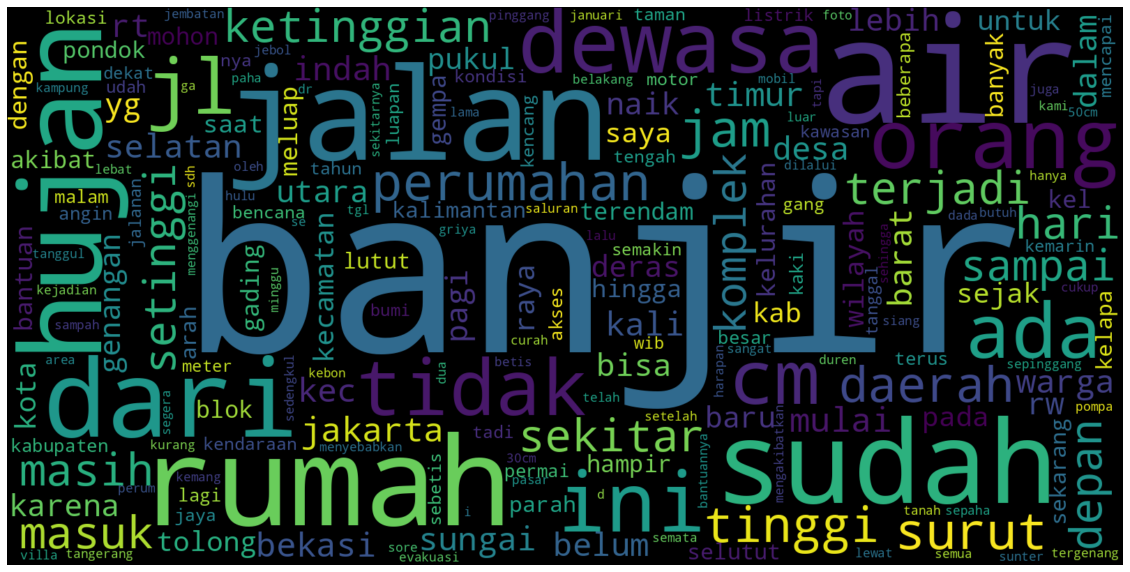

In [ ]:
# TESTING

# Start with one review:
text = df['text']

# Create and generate a word cloud image:

wordcloud = WordCloud(stopwords = ['di','yang','dan','ke'],collocations=False,width=1600, height=800).generate(' '.join(df['text'].str.lower()))
# Display the generated image:
plt.figure( figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#sizenya besarkan
#cleaning particle words (di, dan, yang)
#presentasi mengkaitkan dari words-words yang ada

In [ ]:
#df_time = pd.to_datetime(df['date'],format='%d/%m/%y')
#df_time.head()
#df.groupby(by=[b.index.month, b.index.year])
#df.head()

In [ ]:
# TESTING
# untuk plotting disaster type berdasarkan tahun dan banyak terjadinya
df_time_type = df[['date', 'disaster_type']]
df_time_type

,date,disaster_type
0,01/01/2020,flood
1,01/01/2020,flood
2,01/01/2020,flood
3,01/01/2020,flood
4,01/01/2020,flood
...,...,...
3038,28/12/2021,flood
3039,28/12/2021,flood
3040,28/12/2021,flood
3041,28/12/2021,flood


In [ ]:
df_time_type['date'] = pd.to_datetime(df_time_type['date'])
df_time_type['year'], df_time_type['month'] = df_time_type['date'].dt.year, df_time_type['date'].dt.month
df_time_type

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,disaster_type,year,month
0,2020-01-01,flood,2020,1
1,2020-01-01,flood,2020,1
2,2020-01-01,flood,2020,1
3,2020-01-01,flood,2020,1
4,2020-01-01,flood,2020,1
...,...,...,...,...
3038,2021-12-28,flood,2021,12
3039,2021-12-28,flood,2021,12
3040,2021-12-28,flood,2021,12
3041,2021-12-28,flood,2021,12


In [ ]:
_deepnote_run_altair(df_flood_2020, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"date","type":"temporal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"COUNT(*)","type":"quantitative","sort":null,"aggregate":"count","scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

NameError: name 'df_flood_2020' is not defined

In [ ]:
# TESTING
counts = np.unique(df_time_type['disaster_type'], return_counts=True)
counts

(array(['earthquake', 'fire', 'flood', 'haze', 'volcano', 'wind'],
       dtype=object),
 array([ 109,   12, 2847,    2,   17,   56]))

In [ ]:
# TESTING
# earthquake', 'fire', 'flood', 'haze', 'volcano', 'wind
df_flood_2020 = df_time_type.loc[(df_time_type['disaster_type'].str.contains("flood")) & (df_time_type['year'] == 2020)]
#df_flood_2020.count
df_flood_2021 = df_time_type.loc[(df_time_type['disaster_type'].str.contains("flood")) & (df_time_type['year'] == 2021)]

df_earthquake_2020 = df_time_type.loc[(df_time_type['disaster_type'].str.contains("earthquake")) & (df_time_type['year'] == 2020)]
df_earthquake_2021 = df_time_type.loc[(df_time_type['disaster_type'].str.contains("earthquake")) & (df_time_type['year'] == 2021)]

df_fire_2020 = df_time_type.loc[(df_time_type['disaster_type'].str.contains("fire")) & (df_time_type['year'] == 2020)]
df_fire_2021 = df_time_type.loc[(df_time_type['disaster_type'].str.contains("fire")) & (df_time_type['year'] == 2021)]

df_haze_2020 = df_time_type.loc[(df_time_type['disaster_type'].str.contains("haze")) & (df_time_type['year'] == 2020)]
df_haze_2021 = df_time_type.loc[(df_time_type['disaster_type'].str.contains("haze")) & (df_time_type['year'] == 2021)]

df_volcano_2020 = df_time_type.loc[(df_time_type['disaster_type'].str.contains("volcano")) & (df_time_type['year'] == 2020)]
df_volcano_2021 = df_time_type.loc[(df_time_type['disaster_type'].str.contains("volcano")) & (df_time_type['year'] == 2021)]

df_wind_2020 = df_time_type.loc[(df_time_type['disaster_type'].str.contains("wind")) & (df_time_type['year'] == 2020)]
df_wind_2021 = df_time_type.loc[(df_time_type['disaster_type'].str.contains("wind")) & (df_time_type['year'] == 2021)]

In [ ]:
# TESTING

Disaster_Data_2020 = [len(df_earthquake_2020.index), len(df_fire_2020.index), len(df_flood_2020.index), len(df_haze_2020.index), len(df_volcano_2020.index), len(df_wind_2020.index)]
Disaster_Data_2021 = [len(df_earthquake_2021.index), len(df_fire_2021.index), len(df_flood_2021.index), len(df_haze_2021.index), len(df_volcano_2021.index), len(df_wind_2021.index)]
Disaster_Data_2021

[94, 11, 1078, 2, 17, 50]

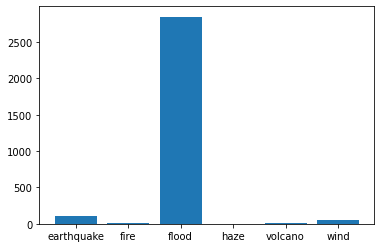

<Figure size 648x2160 with 0 Axes>

In [ ]:
# TESTING
plt.bar(counts[0], counts[1])
plt.figure(figsize=(9, 30))
plt.show()

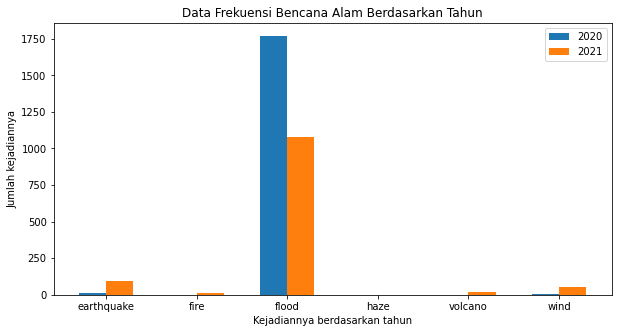

In [ ]:
# TESTING

# Data on X-axis

# Position of bars on x-axis
ind = np.arange(len(counts[0]))

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, Disaster_Data_2020 , width, label='2020')
plt.bar(ind + width, Disaster_Data_2021, width, label='2021')

plt.xlabel('Kejadiannya berdasarkan tahun')
plt.ylabel('Jumlah kejadiannya')
plt.title('Data Frekuensi Bencana Alam Berdasarkan Tahun')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
#plt.xticks(ind + width / 2, ('Xtick1', 'Xtick3', 'Xtick3'))
plt.xticks(ind + width / 2, (counts[0]))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [ ]:
# Summary

# Yang mempunyai data kosong: url, image_url, report_dat, title, text, Id_Desa_, Id_Kec_, Id_ Kab, Id_ prov_ Desa, 
# Kecamatan, Kabupaten, Provinsi

# ID dan lokasinya terkadang ada yang benar-benar kosong, tetapi mempunyai long dan lat
# Hal ini dapat menjadi problematik, tetapi dapat diatasi dengan menggunakan long dan lat

# # pkey tidak diperlukan
# 'ID desa', 'ID kec', 'ID kab', 'ID prov' tidak diperlukan karena telah diwakili oleh kolomnya yang tanpa id
# 'url' & 'image url' tidak diperlukan karena sudah diwakilkan di column 'Source'
# 'title' banyak yang datanya kosong. Selain itu, semua yang ada di 'title' merupakan rangkuman dari 'teks'
# report dat' dan 'tags' dapat dihapus jika digunakan dalam membuat graph

# time ada yg broken karena salah format atau 0

# List Dataframe:
# df = dataframe dengan data yang raw 

# df_Info telah menghapus 'pkey', 'ID_Desa', 'ID_Kec', 'ID_Kab', 'ID_Prov'
# df_Info = dataframe yang dapat digunakan untuk mencari data 
# df_Info_Clean = df_Info yang telah di drop values yang missingnya

# df_Visual telah menghapus 'url', 'image_url', 'title',  'report_dat', dan 'tags'
# df_Visual = dataframe yang dapat digunakan untuk membuat visualisasi 
# df_Visual_Clean = df_Visual yang telah di drop values yang missingnya

In [ ]:
# TESTING
# .value_counts()

In [ ]:
df.to_csv("clean-peta-bencana.csv", index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=af0dd343-a785-437d-ad83-6c6c673c2161' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>